![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Importación librerías
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [27]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [28]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [29]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [30]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [31]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [32]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [33]:
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [34]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7812262183677007

In [35]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [36]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.143030,0.101960,0.024454,0.029938,0.354552,0.138830,0.030787,0.490140,0.073159,0.101339,...,0.025069,0.063208,0.000000,0.362818,0.056648,0.008970,0.017522,0.202605,0.033989,0.018117
4,0.122624,0.085786,0.024213,0.084795,0.370949,0.216657,0.080359,0.515684,0.062976,0.067019,...,0.024734,0.060935,0.000477,0.149703,0.058190,0.014248,0.020099,0.204794,0.030438,0.018506
5,0.151364,0.110284,0.013762,0.075334,0.304837,0.448736,0.021010,0.611544,0.081741,0.169121,...,0.044538,0.261372,0.000000,0.335987,0.128505,0.001016,0.048658,0.423242,0.052693,0.025351
6,0.154448,0.125772,0.020991,0.064124,0.340779,0.140892,0.009133,0.632038,0.068287,0.063631,...,0.131074,0.088418,0.000000,0.197224,0.132208,0.001432,0.039743,0.269385,0.077607,0.017862
7,0.175143,0.210069,0.035476,0.032505,0.313850,0.243150,0.021793,0.427885,0.079781,0.143879,...,0.023859,0.090359,0.000048,0.205117,0.241663,0.002634,0.018403,0.259465,0.021569,0.017585


# EDA


In [37]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [38]:
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [39]:
print(dataTraining.shape)
display(dataTraining.head(2))
print(dataTesting.shape)
display(dataTraining.head(2))

(7895, 5)


,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6


(3383, 3)


,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6


,year,rating
count,7895.000000,7895.000000
mean,1989.726409,6.402812
std,22.660717,1.078260
min,1894.000000,1.200000
25%,1980.000000,5.800000
50%,1997.000000,6.500000
75%,2007.000000,7.200000
max,2015.000000,9.300000


Text(0, 0.5, 'Frequencia')

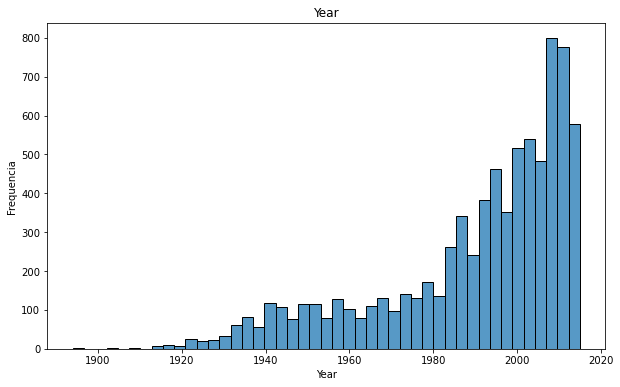

In [40]:
display(dataTraining.describe())
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = dataTraining['year'])
plt.title('Year')
plt.xlabel('Year')
plt.ylabel('Frequencia')

,year,rating
count,7895.000000,7895.000000
mean,1989.726409,6.402812
std,22.660717,1.078260
min,1894.000000,1.200000
25%,1980.000000,5.800000
50%,1997.000000,6.500000
75%,2007.000000,7.200000
max,2015.000000,9.300000


Text(0, 0.5, 'Frequencia')

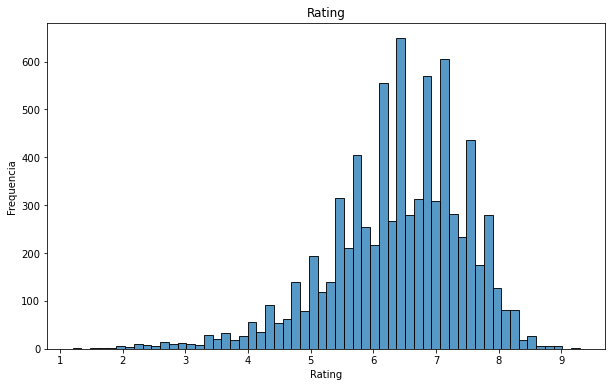

In [41]:
display(dataTraining.describe())
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = dataTraining['rating'])
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Frequencia')

In [42]:
dataTraining.head(2)

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6


In [43]:
dataTraining["genres"] = dataTraining['genres'].map(lambda x: eval(x))

,index,0
0,Drama,3965
1,Comedy,3046
2,Thriller,2024
3,Romance,1892
4,Crime,1447
5,Action,1303
6,Adventure,1024
7,Horror,954
8,Mystery,759
9,Sci-Fi,723


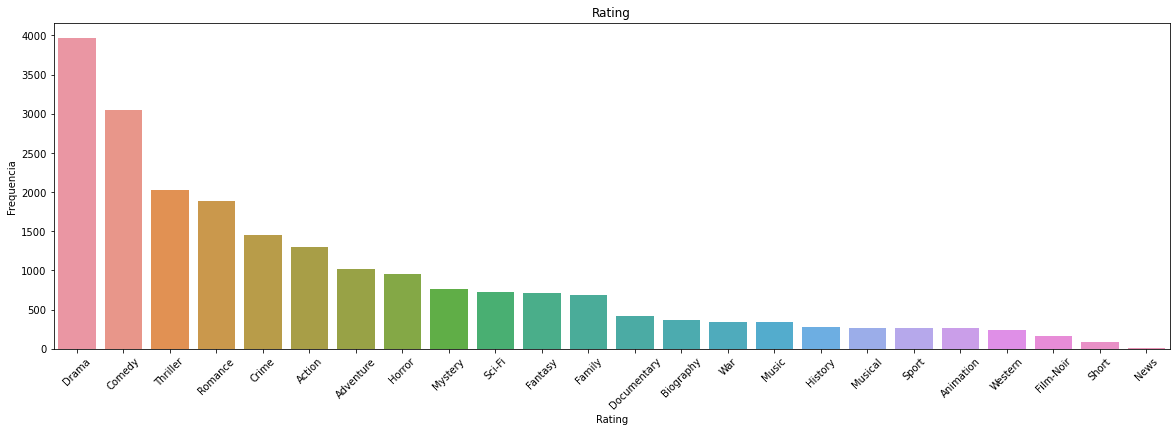

In [44]:
genre_count = pd.DataFrame(pd.value_counts([x for row in dataTraining["genres"].values.tolist() for x in row ])).reset_index()

display(genre_count)
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(data=genre_count, x="index", y= 0)
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Frequencia')
plt.xticks(rotation = 45);

# Preprocesamiento

In [45]:
# Estandarizacion variables de salida
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

X_train, X_test, y_train_genres, y_test_genres = train_test_split(dataTraining.drop(columns=["genres"]), y_genres, test_size=0.20, random_state=42)

In [46]:
# funciones de limpiado de texto
import nltk
nltk.download('wordnet')
import re
import unicodedata
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
  
    # Elimina múltiples espacios
    text = re.sub(r'\s+', ' ', text)
    
    words = text.split()

    words = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words]  

    #text = " ".join(words)

    return words


def clean_text(text):
    # Elimina tildes
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Vuelve el texto minúscula
    text = text.lower()
    
    # Elimina caracteres especiales
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Elimina múltiples espacios
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Lemmatizacion

In [120]:
X_train_lemma = X_train["plot"].apply(lambda x: split_into_lemmas(x))
X_test_lemma = X_test["plot"].apply(lambda x: split_into_lemmas(x))


arr_preprocesados = dict()

#### preprocesamiento CountVectorizer

In [121]:
cv_ngram1 = CountVectorizer( lowercase = True, ngram_range=(1,1), stop_words="english")

X_train_cv_ngram1 = cv_ngram1.fit_transform(X_train_lemma.apply(lambda x : " ".join(x)))
X_test_cv_ngram1 = cv_ngram1.transform(X_test_lemma.apply(lambda x : " ".join(x)))

arr_preprocesados["cv_n1"] = (X_train_cv_ngram1,X_test_cv_ngram1)


cv_ngram3 = CountVectorizer( lowercase = True, ngram_range=(3,3), stop_words="english", max_features=X_train_cv_ngram1.shape[1])
X_train_cv_ngram3 = cv_ngram3.fit_transform(X_train_lemma.apply(lambda x : " ".join(x)))
X_test_cv_ngram3 = cv_ngram3.transform(X_test_lemma.apply(lambda x : " ".join(x)))


arr_preprocesados["cv_n3"] = (X_train_cv_ngram3,X_test_cv_ngram3)


#### preprocesamiento TFIDF

In [122]:
tf_ngram1 = TfidfVectorizer(lowercase = True, ngram_range=(1,1),stop_words="english"
,strip_accents = 'unicode')

X_train_tf_ngram1 = tf_ngram1.fit_transform(X_train_lemma.apply(lambda x : " ".join(x)))
X_test_tf_ngram1 = tf_ngram1.transform(X_test_lemma.apply(lambda x : " ".join(x)))

arr_preprocesados["tfid_n1"] = (X_train_tf_ngram1,X_test_tf_ngram1)

tf_ngram3  = TfidfVectorizer(lowercase = True, ngram_range=(2,3),stop_words="english"
,strip_accents = 'unicode', max_features=X_train_tf_ngram1.shape[1])

X_train_tf_ngram3 = tf_ngram3.fit_transform(X_train_lemma.apply(lambda x : " ".join(x)))
X_test_tf_ngram3 = tf_ngram3.transform(X_test_lemma.apply(lambda x : " ".join(x)))

arr_preprocesados["tfid_n3"] = (X_train_tf_ngram3,X_test_tf_ngram3)


#### preprocesamiento Tokenizer (Keras)

To achieve 95.0% coverage of the dataset, you need to use the top 11368 most common words.


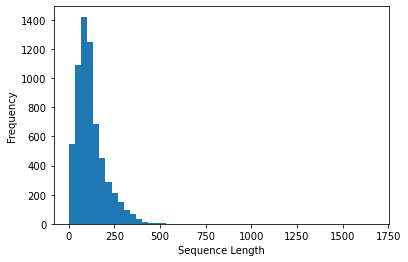

In [123]:
X_train_rd = X_train['plot'].apply(clean_text)
###
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_rd)
###
word_index = tokenizer.word_index

word_counts = list(tokenizer.word_counts.values())
word_counts.sort(reverse=True)
total_word_count = sum(word_counts)
cumulative_word_count = 0

### parametro para la cantidad de texto representada
coverage = 0.95  

###

for i, count in enumerate(word_counts):
    cumulative_word_count += count
    if cumulative_word_count / total_word_count >= coverage:
        break

optimal_words = i + 1
print(f"To achieve {coverage * 100}% coverage of the dataset, you need to use the top {optimal_words} most common words.")

# Nuevo tokenizer con el numero optimo de palabras, reduccion de dimensiones
tokenizer = Tokenizer(num_words=optimal_words)

tokenizer.fit_on_texts(X_train_rd)

sequence_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(X_train_rd)]
plt.hist(sequence_lengths, bins=50)

###
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Parametro a priori de la longitud estandar de las reseñas
max_length = 250


X_train_rd = X_train['plot'].apply(clean_text)
X_test_rd = X_test['plot'].apply(clean_text)

X_train_rd = tokenizer.texts_to_sequences(X_train_rd)
X_test_rd = tokenizer.texts_to_sequences(X_test_rd)

X_train_rd = pad_sequences(X_train_rd, maxlen=max_length)
X_test_rd = pad_sequences(X_test_rd, maxlen=max_length)


arr_preprocesados["tokenizer"] = (X_train_rd,X_test_rd)


#### Preprocesamiento doc2vec

In [124]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [125]:
tagged_data = [TaggedDocument(words=X_train_lemma.loc[idx], tags=[str(idx)]) for idx in X_train_lemma.index]

In [126]:
max_epochs = 100
vec_size = 200
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0,
                window = 20,
                dbow_words = 1,
                workers = 4
                )
  
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=len(tagged_data), epochs=model.epochs)

model.save("d2v.model")
print("Model Saved")

Model Saved


In [157]:
docvec_arrays = np.zeros((len(X_train_lemma), vec_size)) 
for i, txt in enumerate(X_train_lemma):
    docvec_arrays[i,:] = model.infer_vector(txt)

X_train_d2v = pd.DataFrame(docvec_arrays) 
print(X_train_d2v.shape)

docvec_arrays = np.zeros((len(X_test_lemma), vec_size)) 
for i, txt in enumerate(X_test_lemma):
    docvec_arrays[i,:] = model.infer_vector(txt)

X_test_d2v = pd.DataFrame(docvec_arrays) 
print(X_test_d2v.shape)


arr_preprocesados["doc2vec"] = (X_train_d2v,X_test_d2v)

(6316, 200)
(1579, 200)


# Modelos

In [158]:
model_scores = []

## Random Forest

In [159]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


for name, (Xtrain,Xtest) in arr_preprocesados.items():
    print(name)
    rf = OneVsRestClassifier(RandomForestClassifier(random_state=10, n_estimators= 200, n_jobs=-1))

    rf.fit(Xtrain, y_train_genres)

    y_pred = rf.predict_proba(Xtest)
    score = roc_auc_score(y_test_genres, y_pred, average='macro')

    model_scores.append(["rf_"+name,score])

cv_n1
cv_n3
tfid_n1
tfid_n3
tokenizer
doc2vec


In [160]:
model_scores

[['rf_cv_n1', 0.8050786074256208],
 ['rf_cv_n3', 0.5519791184997453],
 ['rf_tfid_n1', 0.816760963495145],
 ['rf_tfid_n3', 0.719706726032582],
 ['rf_tokenizer', 0.5643853427322884],
 ['rf_doc2vec', 0.8222876710997138]]

# XGBoost

In [161]:
from xgboost import XGBClassifier



from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


for name,(Xtrain,Xtest) in arr_preprocesados.items():
    print(name)
    xg = OneVsRestClassifier(XGBClassifier(n_estimators= 100, max_depth=2))

    xg.fit(Xtrain, y_train_genres)

    y_pred = xg.predict_proba(Xtest)
    score = roc_auc_score(y_test_genres, y_pred, average='macro')

    model_scores.append(["xgb_"+name,score])

cv_n1
cv_n3
tfid_n1
tfid_n3
tokenizer
doc2vec


In [220]:
model_scores

[['rf_cv_n1', 0.8050786074256208],
 ['rf_cv_n3', 0.5519791184997453],
 ['rf_tfid_n1', 0.816760963495145],
 ['rf_tfid_n3', 0.719706726032582],
 ['rf_tokenizer', 0.5643853427322884],
 ['rf_doc2vec', 0.8222876710997138],
 ['xgb_cv_n1', 0.8483002957770651],
 ['xgb_cv_n3', 0.5212610792259564],
 ['xgb_tfid_n1', 0.837848358654357],
 ['xgb_tfid_n3', 0.621187224919855],
 ['xgb_tokenizer', 0.5728892235837],
 ['xgb_doc2vec', 0.8690023297196837],
 ['xgbrf_cv_n1', 0.6785959892965959]]

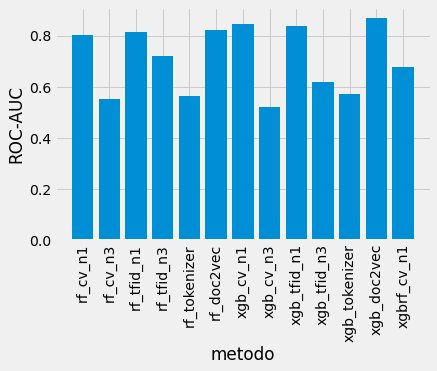

In [221]:
score_df = pd.DataFrame(model_scores,columns=["model","roc_auc"])



#sns.barplot(score_df, x="model", y="roc_auc")
plt.style.use('fivethirtyeight')
plt.bar(x=score_df["model"], height=score_df["roc_auc"])
plt.xlabel('metodo')
plt.ylabel('ROC-AUC')
plt.xticks(rotation=90);


# Calibracion

se seleccionan los modelos de xgboost con preprocesamiento de CountVectorizer, TFIDF y doc2vec

In [208]:
arr_preprocesados.keys()

dict_keys(['cv_n1', 'cv_n3', 'tfid_n1', 'tfid_n3', 'tokenizer', 'doc2vec'])

100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
max value 0.8734890568852953
max arg 105


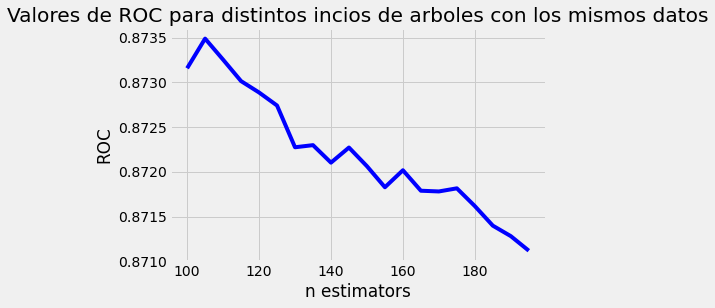

In [214]:
roc_arr = []

Xtrain_cal = arr_preprocesados['doc2vec'][0]
Xtest_cal = arr_preprocesados['doc2vec'][1]

values = np.arange(100,200,5)
for n in values:
    print(n)

    xg = OneVsRestClassifier(XGBClassifier(n_estimators= n, max_depth=2, tree_method="gpu_hist"))

    xg.fit(Xtrain_cal, y_train_genres)

    y_pred = xg.predict_proba(Xtest_cal)
    roc = roc_auc_score(y_test_genres, y_pred, average='macro')

    roc_arr.append(roc)


print("max value {}".format(roc_arr[np.argmax(roc_arr)]))
print("max arg {}".format(values[np.argmax(roc_arr)]))

plt.title('Valores de ROC para distintos incios de arboles con los mismos datos')
plt.plot(values, roc_arr, 'b',)
plt.ylabel('ROC')
plt.xlabel('n estimators')
plt.show()

2
4
6
8
10
12
14
16
18
max value 0.8734890568852953
max arg 2


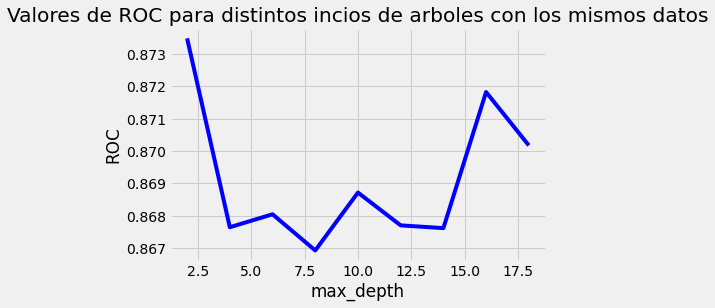

In [215]:
roc_arr = []

Xtrain_cal = arr_preprocesados['doc2vec'][0]
Xtest_cal = arr_preprocesados['doc2vec'][1]

values = np.arange(2,20,2)
for n in values:
    print(n)

    xg = OneVsRestClassifier(XGBClassifier(n_estimators= 105, max_depth=n, tree_method="gpu_hist"))

    xg.fit(Xtrain_cal, y_train_genres)

    y_pred = xg.predict_proba(Xtest_cal)
    roc = roc_auc_score(y_test_genres, y_pred, average='macro')

    roc_arr.append(roc)


print("max value {}".format(roc_arr[np.argmax(roc_arr)]))
print("max arg {}".format(values[np.argmax(roc_arr)]))

plt.title('Valores de ROC para distintos incios de arboles con los mismos datos')
plt.plot(values, roc_arr, 'b',)
plt.ylabel('ROC')
plt.xlabel('max_depth')
plt.show()

#### Random Forest

5
6
7
8
9
max value 0.8430062734344569
max arg 6


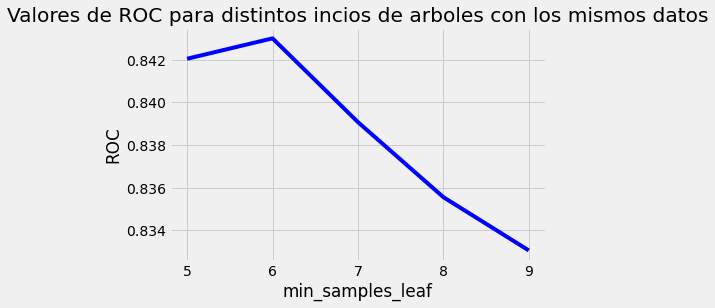

In [218]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Xtrain_cal = arr_preprocesados['tfid_n1'][0]
Xtest_cal = arr_preprocesados['tfid_n1'][1]
roc_arr = []

values = np.arange(5,10,1)
for n in values:
    print(n)

    rf = OneVsRestClassifier(RandomForestClassifier(random_state=10, n_estimators= 220, n_jobs=-1, min_samples_leaf=n))
    rf.fit(Xtrain_cal, y_train_genres)
    y_pred = rf.predict_proba(Xtest_cal)
    roc = roc_auc_score(y_test_genres, y_pred, average='macro')

    roc_arr.append(roc)


print("max value {}".format(roc_arr[np.argmax(roc_arr)]))
print("max arg {}".format(values[np.argmax(roc_arr)]))

plt.title('Valores de ROC para distintos incios de arboles con los mismos datos')
plt.plot(values, roc_arr, 'b',)
plt.ylabel('ROC')
plt.xlabel('min_samples_leaf')
plt.show()

2
4
6
8
max value 0.838943839546038
max arg 4


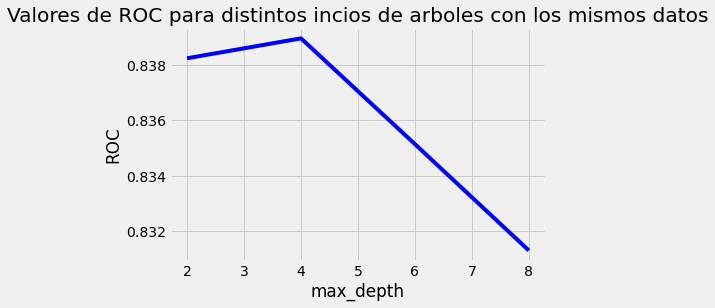

In [227]:
roc_arr = []

Xtrain_cal = arr_preprocesados['tfid_n1'][0]
Xtest_cal = arr_preprocesados['tfid_n1'][1]

values = np.arange(2,10,2)
for n in values:
    print(n)

    xg = OneVsRestClassifier(XGBClassifier(n_estimators= 105, max_depth=n))

    xg.fit(Xtrain_cal, y_train_genres)

    y_pred = xg.predict_proba(Xtest_cal)
    roc = roc_auc_score(y_test_genres, y_pred, average='macro')

    roc_arr.append(roc)


print("max value {}".format(roc_arr[np.argmax(roc_arr)]))
print("max arg {}".format(values[np.argmax(roc_arr)]))

plt.title('Valores de ROC para distintos incios de arboles con los mismos datos')
plt.plot(values, roc_arr, 'b',)
plt.ylabel('ROC')
plt.xlabel('max_depth')
plt.show()

## Combinado

In [182]:
from sklearn.base import BaseEstimator, TransformerMixin

class transform_d2v(BaseEstimator, TransformerMixin):
    # initializer 
    def __init__(self):
        pass;    
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        x_lemma = X.apply(lambda x: split_into_lemmas(x))

        docvec_arrays = np.zeros((len(x_lemma), vec_size)) 
        for i, txt in enumerate(x_lemma):
            docvec_arrays[i,:] = model.infer_vector(txt)
            
            X_train_d2v = pd.DataFrame(docvec_arrays) 

        return X_train_d2v
    
    def fit_transform(self, X, y=None, **fit_params):
        
        x_lemma = X.apply(lambda x: split_into_lemmas(x))

        docvec_arrays = np.zeros((len(x_lemma), vec_size)) 
        for i, txt in enumerate(x_lemma):
            docvec_arrays[i,:] = model.infer_vector(txt)
            
            X_train_d2v = pd.DataFrame(docvec_arrays) 
        
        return X_train_d2v


class transform_split_into_lemmas(BaseEstimator, TransformerMixin):
    # initializer 
    def __init__(self):
        pass;    
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        # return the dataframe with the specified features
        ret = X.apply(lambda x: split_into_lemmas(x))
        ret = X.apply(lambda x: "".join(x))
        return ret
    
    def fit_transform(self, X, y=None, **fit_params):
        ret = X.apply(lambda x: split_into_lemmas(x))
        ret = X.apply(lambda x: "".join(x))
        return ret

In [222]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier


estimators = [
    ("cv-xgb", make_pipeline(transform_split_into_lemmas(),CountVectorizer( lowercase = True, ngram_range=(1,1), stop_words="english",strip_accents = 'unicode'), XGBClassifier(n_estimators= 180, max_depth=1))),
    ("tfid-xgb", make_pipeline(transform_split_into_lemmas(),TfidfVectorizer( lowercase = True, ngram_range=(1,1), stop_words="english",strip_accents = 'unicode'), XGBClassifier(n_estimators= 180, max_depth=1))),
    ("tfid-rf", make_pipeline(transform_split_into_lemmas(),TfidfVectorizer(lowercase = True, ngram_range=(1,1), stop_words="english",strip_accents = 'unicode'), RandomForestClassifier(random_state=10, n_estimators= 220, n_jobs=-1,min_samples_leaf=6))),
    ("d2v", make_pipeline(transform_split_into_lemmas(),transform_d2v(), XGBClassifier(n_estimators= 105, max_depth=2)))
]

clf = OneVsRestClassifier(VotingClassifier(estimators=estimators, voting="soft", n_jobs=-1))
clf.fit(X_train["plot"], y_train_genres)



0.8862557379498117

In [ ]:
y_pred = clf.predict_proba(X_test["plot"])
roc_auc_score(y_test_genres, y_pred, average='macro')

In [137]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, VotingClassifier

estimators = [
    ("cross", make_pipeline(CountVectorizer( lowercase = True, ngram_range=(1,3),analyzer=split_into_lemmas, stop_words="english",strip_accents = 'unicode'), XGBClassifier(n_estimators= 180, max_depth=1))),
    ("tfid", make_pipeline(TfidfVectorizer(lowercase = True, ngram_range=(1,3),analyzer=split_into_lemmas, stop_words="english",strip_accents = 'unicode'), RandomForestClassifier(random_state=10, n_estimators= 220, n_jobs=-1)))
]

clf = OneVsRestClassifier(VotingClassifier(estimators=estimators, voting="soft", n_jobs=-1))
clf.fit(X_train["plot"], y_train_genres)


y_pred = clf.predict_proba(X_test["plot"])
roc_auc_score(y_test_genres, y_pred, average='macro')

0.8741893913985875

# Salida

In [ ]:
le.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'], dtype=object)

In [223]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = dataTesting['plot']

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [235]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)

res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.067730,0.078941,0.019345,0.025407,0.392733,0.108632,0.021869,0.575328,0.053897,0.089992,...,0.027773,0.074359,0.000184,0.516125,0.041560,0.007209,0.009380,0.189533,0.010253,0.010292
4,0.124209,0.038813,0.024131,0.082740,0.367814,0.305024,0.046613,0.639507,0.052741,0.030986,...,0.017217,0.038307,0.000616,0.112835,0.020515,0.011619,0.015505,0.266261,0.029271,0.009510
5,0.084483,0.022290,0.002621,0.022501,0.100168,0.712399,0.006820,0.792220,0.012296,0.028883,...,0.010543,0.311280,0.000797,0.185915,0.027996,0.001194,0.013879,0.575404,0.019624,0.004708
6,0.119997,0.082033,0.004535,0.050935,0.169028,0.095949,0.030215,0.636019,0.040738,0.048801,...,0.023936,0.145076,0.000252,0.192584,0.160383,0.000853,0.026874,0.379374,0.035854,0.013138
7,0.154241,0.163182,0.019995,0.043151,0.278867,0.113485,0.011044,0.212962,0.041562,0.221364,...,0.022305,0.086615,0.000370,0.117867,0.517628,0.002723,0.008168,0.258019,0.009621,0.009001
